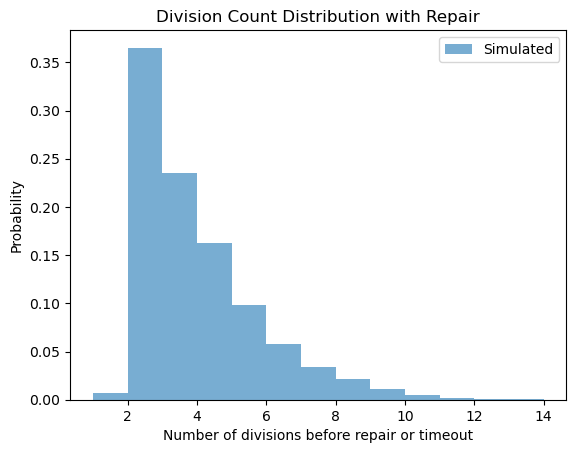

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5 # division rate (λ)
T= 10          # end time
rho = 0.3      # repair rate

# Exponential-based repair probability 
def repair_probability(rho, deltaT):
    return 1 - np.exp(-rho * deltaT)

# experiment: track divisions until repair or end time
def experiment_with_repair(mitRate, T, rho):
    t = 0
    nDivisions = 1
    
    while True:
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT #t+divisiontime
        
        if t > T:
            break  # end of time reached
        
        # Check for repair (Bernoulli trial)
        if rng.uniform() < repair_probability(rho, deltaT):
            nDivisions += 1  # still count this division before repair
            break
        
        nDivisions += 1  # no repair, continue
    
    return nDivisions

# Run trials
experimentResults = [experiment_with_repair(mitRate, T, rho) for _ in range(nTrials)]

# Plot histogram
plt.hist(experimentResults, bins=range(1, max(experimentResults)+2), density=True, alpha=0.6, label='Simulated')


plt.xlabel("Number of divisions before repair or timeout")
plt.ylabel("Probability")
plt.title("Division Count Distribution with Repair")
plt.legend()
plt.show()


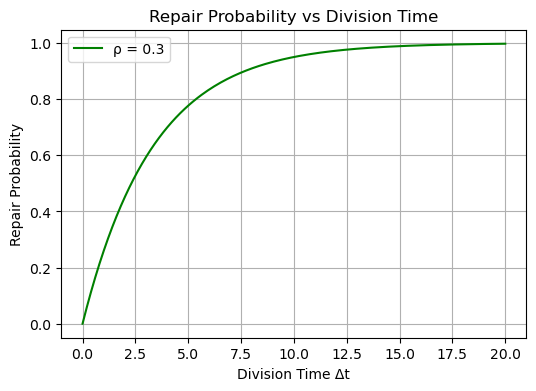

In [69]:
# Time range (possible division times)
deltaT_range = np.linspace(0, 20, 200)

# Corresponding repair probabilities
repair_probs = [repair_probability(rho, dt) for dt in deltaT_range]

plt.figure(figsize=(6, 4))
plt.plot(deltat_range, repair_probs, label=f'ρ = {rho}', color='green')
plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time")
plt.grid(True)
plt.legend()
plt.show()


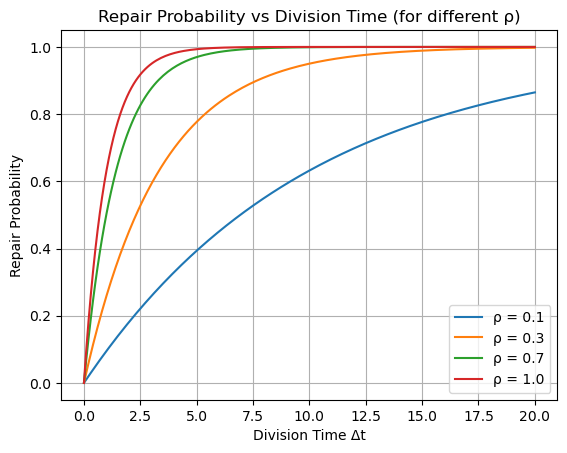

In [29]:
rhos = [0.1, 0.3, 0.7, 1.0]
for rho_val in rhos:
    repair_probs = [repair_probability(rho_val, dt) for dt in deltaT_range]
    plt.plot(deltaT_range, repair_probs, label=f'ρ = {rho_val}')

plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time (for different ρ)")
plt.legend()
plt.grid(True)
plt.show()
